In [86]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("/content/data_frc_1787_to_1791_with_rev_year_dummy.csv")

In [3]:
df.head()

,Unnamed: 0,date,topicmodel,call_number,openai_embedding,post_rev
0,0,1790,"{'36', '20', '38'}",Case folio FRC 9241,"[0.032563600689172745, -0.027827078476548195, ...",1.0
1,1,1790,"{'44', '23', '02'}",Case FRC 289,"[0.031268347054719925, -0.031268347054719925, ...",1.0
2,2,1790,"{'37', '29', '34'}",Case FRC 20150,"[0.03666583076119423, -0.06944313645362854, -0...",1.0
3,3,1790,"{'03', '04', '01'}",Case FRC 16901,"[0.011695176362991333, -0.04674675688147545, -...",1.0
4,4,1790,"{'35', '38', '29'}",Case folio FRC 27020,"[0.012459567748010159, -0.0034924547653645277,...",1.0


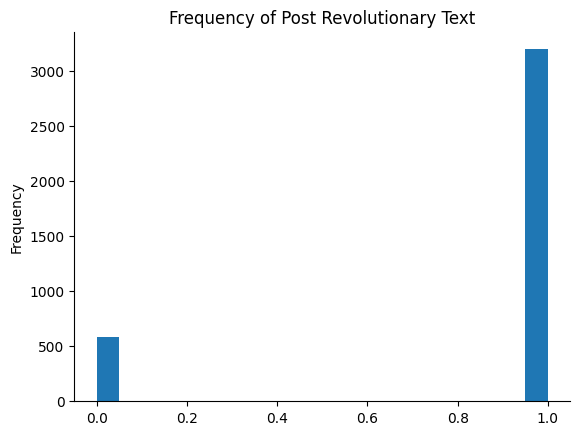

In [6]:
from matplotlib import pyplot as plt
df['post_rev'].plot(kind='hist', bins=20, title='Frequency of Post Revolutionary Text')
plt.gca().spines[['top', 'right',]].set_visible(False)

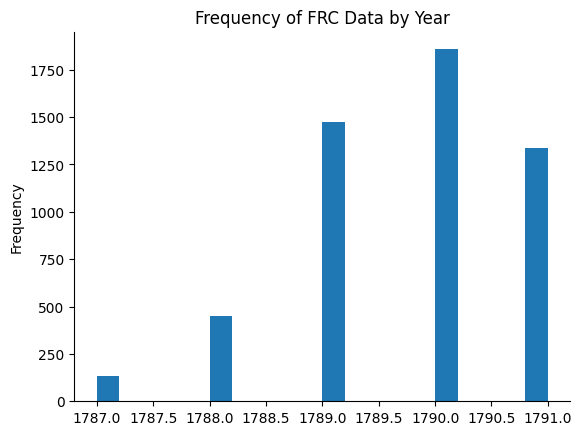

In [7]:
from matplotlib import pyplot as plt
df['date'].plot(kind='hist', bins=20, title='Frequency of FRC Data by Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
len(df)

5232

In [5]:
df_pre_post = df[df['date'] != 1789].copy()

In [58]:
df_pre_post.date.unique()

array([1790, 1791, 1788, 1787])

In [59]:
# Number of positive samples
len(df_pre_post.loc[df_pre_post['post_rev']==1,])

3178

In [60]:
# Number of negative samples
len(df_pre_post.loc[df_pre_post['post_rev']==0,])

579

In [61]:
any(df_pre_post['post_rev'].isna()==True)

False

In [6]:
df_pre_post['openai_embedding'] = df_pre_post['openai_embedding'].apply(lambda x: ast.literal_eval(x))

In [63]:
df_pre_post['openai_embedding'].head(10)

0    [0.032563600689172745, -0.027827078476548195, ...
1    [0.031268347054719925, -0.031268347054719925, ...
2    [0.03666583076119423, -0.06944313645362854, -0...
3    [0.011695176362991333, -0.04674675688147545, -...
4    [0.012459567748010159, -0.0034924547653645277,...
5    [0.06023929640650749, -0.02725110948085785, -0...
6    [0.02000940777361393, -0.005340734031051397, -...
7    [0.003055283799767494, -0.019058657810091972, ...
8    [0.014690271578729153, 0.0034852148965001106, ...
9    [0.0032873915042728186, -0.0025112517178058624...
Name: openai_embedding, dtype: object

In [7]:
# Check shapes of embeddings
embedding_shapes = df_pre_post['openai_embedding'].apply(lambda x: len(x))
print(embedding_shapes.value_counts())

openai_embedding
3072    3757
Name: count, dtype: int64


In [8]:
# Extracting features and labels
X = df_pre_post['openai_embedding'].to_list()
y = df_pre_post['post_rev'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)


In [10]:
# Train a logistic regression model and predict
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

# Print the test set results
for i in range(len(y_test[1:20])):
    print(f"True: {y_test[i]}, Predicted: {y_pred[i]}")


Model accuracy: 0.925531914893617
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 0.0, Predicted: 0.0
True: 1.0, Predicted: 1.0
True: 0.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 0.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0


In [12]:
len(df_pre_post.loc[df_pre_post['post_rev']==1,])

3178

### Testing oversampling of minority class

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
# Oversample training data using SMOTE
smote = SMOTE(random_state=43)
X_train_os, y_train_os = smote.fit_resample(X_train, y_train)

In [15]:
# Train a logistic regression model and predict
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_os, y_train_os)

y_pred_smote = model_smote.predict(X_test)

In [16]:
# Calculate accuracy
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Model accuracy using SMOTE: {accuracy_smote}")

for i in range(len(y_test[1:20])):
    print(f"True: {y_test[i]}, Predicted: {y_pred_smote[i]}")

Model accuracy using SMOTE: 0.9375
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 0.0, Predicted: 0.0
True: 1.0, Predicted: 1.0
True: 0.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 0.0, Predicted: 0.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0


### Using class weights

In [17]:
# Train a logistic regression model with class weights and predict
model_wghtd = LogisticRegression(max_iter=1000, class_weight='balanced')
model_wghtd.fit(X_train, y_train)

y_pred_wghtd = model_wghtd.predict(X_test)

In [18]:
# Calculate accuracy
accuracy_wghtd = accuracy_score(y_test, y_pred_wghtd)
print(f"Model accuracy using class weights: {accuracy_wghtd}")

for i in range(len(y_test[1:20])):
    print(f"True: {y_test[i]}, Predicted: {y_pred_wghtd[i]}")

Model accuracy using class weights: 0.9228723404255319
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 0.0, Predicted: 0.0
True: 1.0, Predicted: 1.0
True: 0.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 0.0, Predicted: 0.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0


### Undersampling majority class

In [19]:
from imblearn.under_sampling import RandomUnderSampler

In [20]:
# Undersample the majority class in the training data
undersampler = RandomUnderSampler(random_state=43)
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

# Train a logistic regression model
model_us = LogisticRegression(max_iter=1000)
model_us.fit(X_train_us, y_train_us)

# Make predictions on the test set
y_pred_us = model_us.predict(X_test)

# Calculate accuracy
accuracy_us = accuracy_score(y_test, y_pred_us)
print(f"Model accuracy with undersampled majority class: {accuracy_us}")

for i in range(len(y_test[1:20])):
    print(f"True: {y_test[i]}, Predicted: {y_pred_us[i]}")

Model accuracy with undersampled majority class: 0.9095744680851063
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 0.0, Predicted: 0.0
True: 1.0, Predicted: 1.0
True: 0.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 0.0, Predicted: 0.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0
True: 1.0, Predicted: 1.0


# Out of sample predictions

In [21]:
# Process out-of-sample data for 1789

df_1789 = df.loc[df['date']==1789,].copy()

X_1789 = df_1789['openai_embedding'].apply(lambda x: ast.literal_eval(x)).tolist()

# Make predictions on the new out-of-sample data
new_predictions = model.predict(X_1789)
new_pred_smote = model_smote.predict(X_1789)
new_pred_wghtd = model_wghtd.predict(X_1789)
new_pred_us = model_us.predict(X_1789)

In [22]:
df_1789['predicted_post_rev'] = new_predictions
df_1789['new_pred_smote'] = new_pred_smote
df_1789['new_pred_wghtd'] = new_pred_wghtd
df_1789['new_pred_us'] = new_pred_us

In [23]:
df_1789.head(10)

,Unnamed: 0,date,topicmodel,call_number,openai_embedding,post_rev,predicted_post_rev,new_pred_smote,new_pred_wghtd,new_pred_us
3757,3757,1789,"{'08', '34', '09'}",Case folio FRC 26547,"[0.040274132043123245, -0.05076149106025696, -...",NaN,0.0,0.0,0.0,0.0
3758,3758,1789,"{'05', '36', '37'}",Case FRC 7695,"[0.05813770741224289, -0.02943241223692894, -0...",NaN,1.0,0.0,0.0,0.0
3759,3759,1789,"{'35', '37', '05'}",Case folio FRC 9844,"[0.021883737295866013, -0.0226427111774683, -0...",NaN,0.0,0.0,0.0,0.0
3760,3760,1789,"{'05', '49', '01'}",Case FRC 4726,"[0.026291875168681145, -0.034498490393161774, ...",NaN,1.0,0.0,0.0,0.0
3761,3761,1789,"{'42', '08', '05'}",Case FRC 24681,"[0.024886390194296837, -0.011421369388699532, ...",NaN,0.0,0.0,0.0,0.0
3762,3762,1789,"{'46', '03', '43'}",Case FRC 18182,"[0.007083874195814133, -0.016400860622525215, ...",NaN,1.0,0.0,0.0,0.0
3763,3763,1789,"{'05', '04', '37'}",Case FRC 1305,"[0.030170364305377007, -0.029536055400967598, ...",NaN,0.0,0.0,0.0,0.0
3764,3764,1789,"{'03', '02', '05'}",Case FRC 4598,"[0.039673980325460434, -0.031077951192855835, ...",NaN,1.0,0.0,0.0,0.0
3765,3765,1789,"{'31', '49', '12'}",Case FRC 25109,"[0.05300557240843773, -0.04306068643927574, 0....",NaN,1.0,0.0,0.0,0.0
3766,3766,1789,"{'03', '08', '06'}",Case FRC 6070,"[0.02446330152451992, -0.030085915699601173, -...",NaN,1.0,1.0,1.0,1.0


In [ ]:
df_1789.to_csv("frc_1789_post_rev_predictions.csv")

## Classification of Pre- and Post-Revolutionary Classification Model Parameter Analysis

In [24]:
# Predict pre and post classification using trained models
df_pre_post['post_rev_pred'] = model.predict(df_pre_post['openai_embedding'].to_list())
df_pre_post['post_rev_smote'] = model_smote.predict(df_pre_post['openai_embedding'].to_list())
df_pre_post['post_rev_wghtd'] = model_wghtd.predict(df_pre_post['openai_embedding'].to_list())
df_pre_post['post_rev_us'] = model_us.predict(df_pre_post['openai_embedding'].to_list())

In [25]:
# Get probabilities of pre and post classification using trained models
df_pre_post['post_rev_pred_prob'] = model.predict_proba(df_pre_post['openai_embedding'].to_list())[:, 1]
df_pre_post['post_rev_smote_prob'] = model_smote.predict_proba(df_pre_post['openai_embedding'].to_list())[:, 1]
df_pre_post['post_rev_wghtd_prob'] = model_wghtd.predict_proba(df_pre_post['openai_embedding'].to_list())[:, 1]
df_pre_post['post_rev_us_prob'] = model_us.predict_proba(df_pre_post['openai_embedding'].to_list())[:, 1]

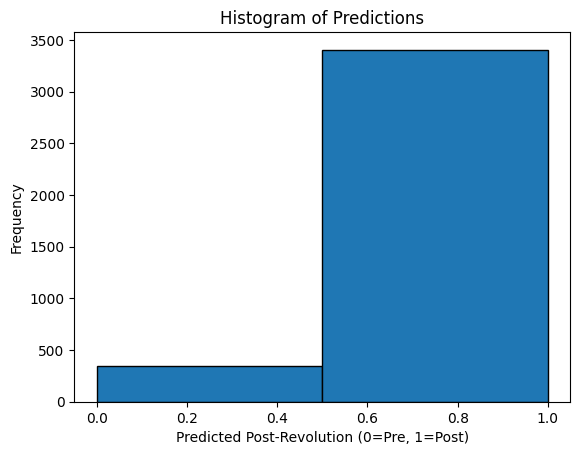

In [90]:
#  Visualize Histogram of Predictions

plt.hist(df_pre_post['post_rev_pred'], bins=2, edgecolor='black')
plt.title('Histogram of Predictions')
plt.xlabel('Predicted Post-Revolution (0=Pre, 1=Post)')
plt.ylabel('Frequency')
plt.show()


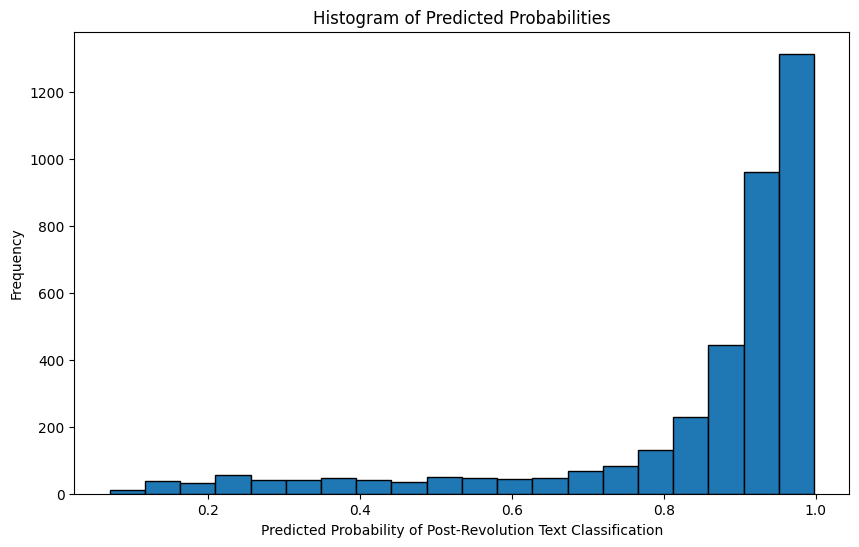

In [87]:
# Histogram of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(df_pre_post['post_rev_pred_prob'], bins=20, edgecolor='black')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability of Post-Revolution Text Classification')
plt.ylabel('Frequency')
plt.show()


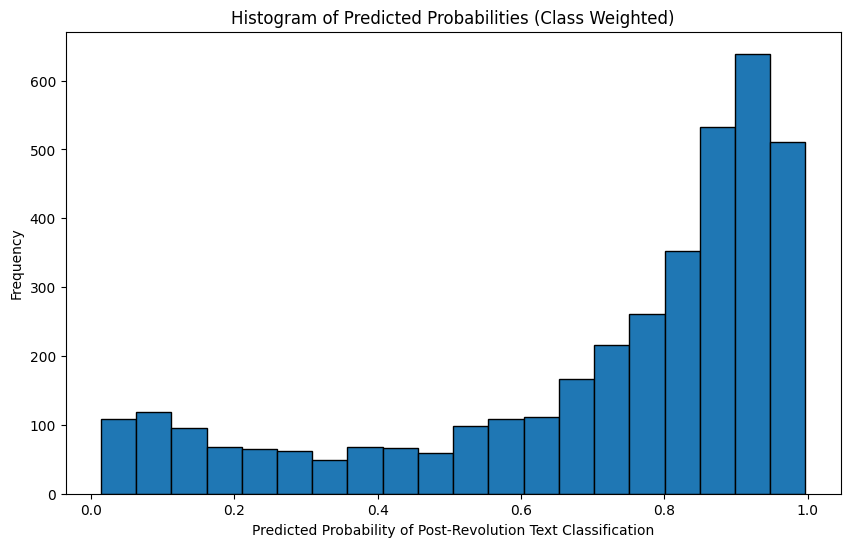

In [88]:
# Histogram of class weighted predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(df_pre_post['post_rev_wghtd_prob'], bins=20, edgecolor='black')
plt.title('Histogram of Predicted Probabilities (Class Weighted)')
plt.xlabel('Predicted Probability of Post-Revolution Text Classification')
plt.ylabel('Frequency')
plt.show()


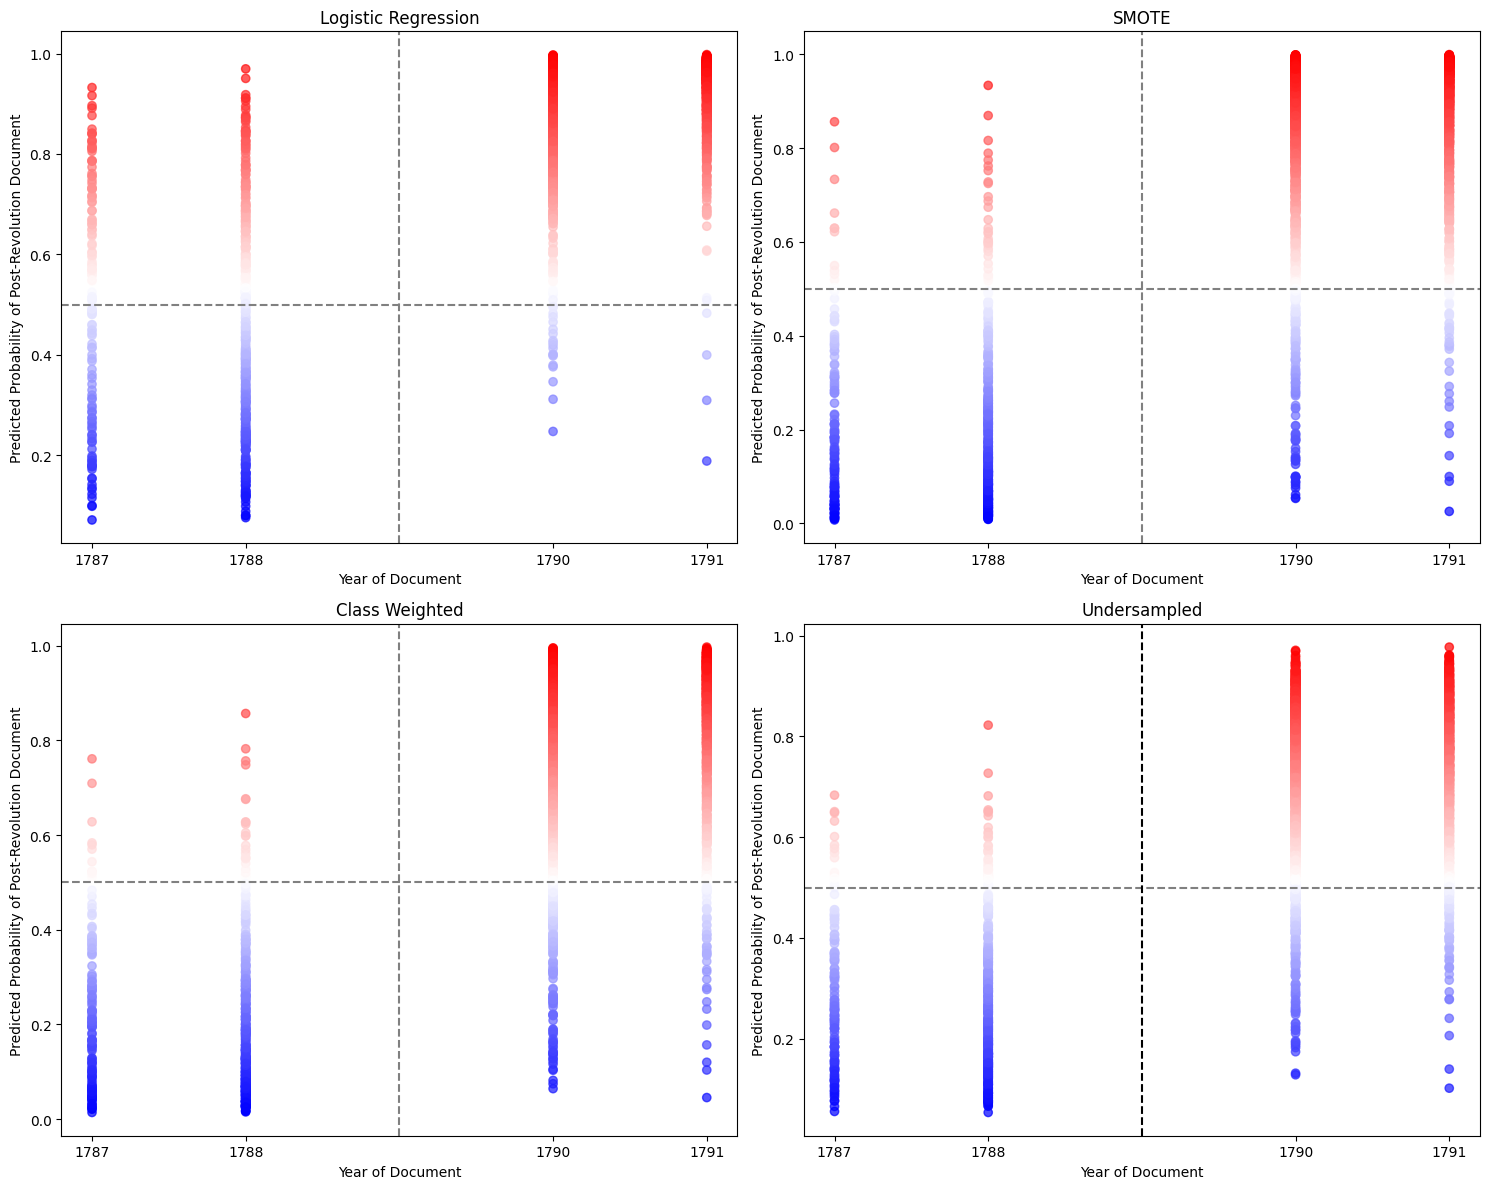

In [85]:
# Analyze Phase Transition

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

years = df_pre_post['date'].unique()
years.sort()

mid_year = (years[0] + years[-1]) / 2

# Logistic Regression plot
axs[0, 0].scatter(df_pre_post['date'], df_pre_post['post_rev_pred_prob'], c=df_pre_post['post_rev_pred_prob'], cmap='bwr', alpha=0.7)
axs[0, 0].axhline(y=0.5, color='grey', linestyle='--')
axs[0, 0].axvline(x=mid_year, color='grey', linestyle='--')
axs[0, 0].set_title('Logistic Regression')
axs[0, 0].set_xlabel('Year of Document')
axs[0, 0].set_ylabel('Predicted Probability of Post-Revolution Document')
axs[0, 0].set_xticks(years)
axs[0, 0].set_xticklabels(years)

# SMOTE plot
axs[0, 1].scatter(df_pre_post['date'], df_pre_post['post_rev_smote_prob'], c=df_pre_post['post_rev_smote_prob'], cmap='bwr', alpha=0.7)
axs[0, 1].axhline(y=0.5, color='grey', linestyle='--')
axs[0, 1].axvline(x=mid_year, color='grey', linestyle='--')
axs[0, 1].set_title('SMOTE')
axs[0, 1].set_xlabel('Year of Document')
axs[0, 1].set_ylabel('Predicted Probability of Post-Revolution Document')
axs[0, 1].set_xticks(years)
axs[0, 1].set_xticklabels(years)

# Class Weighted plot
axs[1, 0].scatter(df_pre_post['date'], df_pre_post['post_rev_wghtd_prob'], c=df_pre_post['post_rev_wghtd_prob'], cmap='bwr', alpha=0.7)
axs[1, 0].axhline(y=0.5, color='grey', linestyle='--')
axs[1, 0].axvline(x=mid_year, color='grey', linestyle='--')
axs[1, 0].set_title('Class Weighted')
axs[1, 0].set_xlabel('Year of Document')
axs[1, 0].set_ylabel('Predicted Probability of Post-Revolution Document')
axs[1, 0].set_xticks(years)
axs[1, 0].set_xticklabels(years)

# Undersampled plot
axs[1, 1].scatter(df_pre_post['date'], df_pre_post['post_rev_us_prob'], c=df_pre_post['post_rev_us_prob'], cmap='bwr', alpha=0.7)
axs[1, 1].axhline(y=0.5, color='grey', linestyle='--')
axs[1, 1].axvline(x=mid_year, color='black', linestyle='--')
axs[1, 1].set_title('Undersampled')
axs[1, 1].set_xlabel('Year of Document')
axs[1, 1].set_ylabel('Predicted Probability of Post-Revolution Document')
axs[1, 1].set_xticks(years)
axs[1, 1].set_xticklabels(years)

# Adjust layout
plt.tight_layout()
plt.show()

In [72]:
# Add columns to indicate misclassification
df_pre_post['misclassified'] = df_pre_post['post_rev'] != df_pre_post['post_rev_pred']
df_pre_post['misclassified_smote'] = df_pre_post['post_rev'] != df_pre_post['post_rev_smote']
df_pre_post['misclassified_wghtd'] = df_pre_post['post_rev'] != df_pre_post['post_rev_wghtd']
df_pre_post['misclassified_us'] = df_pre_post['post_rev'] != df_pre_post['post_rev_us']


In [78]:
# Calculate misclassifications for each class
misclassified_counts = {
    'Model': ['Logistic Regression', 'SMOTE', 'Class Weighted', 'Undersampled'],
    'Pre-Rev Total': [
        df_pre_post[(df_pre_post['post_rev'] == 0)].shape[0],
        df_pre_post[(df_pre_post['post_rev'] == 0)].shape[0],
        df_pre_post[(df_pre_post['post_rev'] == 0)].shape[0],
        df_pre_post[(df_pre_post['post_rev'] == 0)].shape[0]
    ],
    'Pre-Rev Misclassified': [
        df_pre_post[(df_pre_post['post_rev'] == 0) & (df_pre_post['misclassified'])].shape[0],
        df_pre_post[(df_pre_post['post_rev'] == 0) & (df_pre_post['misclassified_smote'])].shape[0],
        df_pre_post[(df_pre_post['post_rev'] == 0) & (df_pre_post['misclassified_wghtd'])].shape[0],
        df_pre_post[(df_pre_post['post_rev'] == 0) & (df_pre_post['misclassified_us'])].shape[0]
    ],
    'Post-Rev Total': [
        df_pre_post[(df_pre_post['post_rev'] == 1)].shape[0],
        df_pre_post[(df_pre_post['post_rev'] == 1)].shape[0],
        df_pre_post[(df_pre_post['post_rev'] == 1)].shape[0],
        df_pre_post[(df_pre_post['post_rev'] == 1)].shape[0]
    ],
    'Post-Rev Misclassified': [
        df_pre_post[(df_pre_post['post_rev'] == 1) & (df_pre_post['misclassified'])].shape[0],
        df_pre_post[(df_pre_post['post_rev'] == 1) & (df_pre_post['misclassified_smote'])].shape[0],
        df_pre_post[(df_pre_post['post_rev'] == 1) & (df_pre_post['misclassified_wghtd'])].shape[0],
        df_pre_post[(df_pre_post['post_rev'] == 1) & (df_pre_post['misclassified_us'])].shape[0]
    ]
}

misclassification_df = pd.DataFrame(misclassified_counts)

In [79]:
# Misclassifications

display(misclassification_df)

,Model,Pre-Rev Total,Pre-Rev Misclassified,Post-Rev Total,Post-Rev Misclassified
0,Logistic Regression,579,252,3178,23
1,SMOTE,579,42,3178,166
2,Class Weighted,579,38,3178,211
3,Undersampled,579,52,3178,283


In [80]:
df_pre_post.to_csv("frc_pre_post_all_predictions.csv")